# Extremely Brief Intro to Pandas
## `merge` and `read_csv`: Two Major Time-Saving Functions

A very handy Pandas cheatsheet:
https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# to create high-resolution figures
%config InlineBackend.figure_format = "retina"

### `merge`: joining two dataframes

In [2]:
# Columns name & mass
# Rows 0, 1, 2

a = pd.DataFrame({
    'name': ['A', 'B', 'C'],
    'mass': [1, 2, 3],
})

a

,name,mass
0,A,1
1,B,2
2,C,3


We can convert a Pandas DataFrame to a numpy array with `.values`.

In [3]:
a.values

array([['A', 1],
       ['B', 2],
       ['C', 3]], dtype=object)

However, an array with mixed type won't be that useful for numpy's vectorized numerical operations. Let's select one column and convert it to a 1-D numerical array.

In [4]:
a['mass']

0    1
1    2
2    3
Name: mass, dtype: int64

In [5]:
a['mass'].values

array([1, 2, 3])

In [6]:
# One shared column with `a` and one different column from `a`

b = pd.DataFrame({
    'name': ['A', 'B', 'D'],
    'is_agn': [True, False, True]
})

b

,name,is_agn
0,A,True
1,B,False
2,D,True


In [7]:
# Inner merge: intersection
inner = pd.merge(a, b, on='name', how='inner')
inner

,name,mass,is_agn
0,A,1,True
1,B,2,False


#### What happened?
We found rows in `a` and `b` that had the same value in column 'x1'. We then returned the values for the other columns from `a` and `b`. This is very useful for when you are cross-matching data sets.

### Exercise 1

Do a merge that preserves all rows from both input dataframes (i.e., a union).

Note: this is called an "outer" merge. What happened?


In [8]:
# YOUR CODE HERE

outer = pd.merge(a, b, on='name', how='outer')

### Exercise 2: Saving Our DataFrame and Reading It Back
Let's save it as a Comma Separated Values (CSV) file using the DataFrame's `to_csv()` method. Only provide the filename ("super_important_data.csv") without any other arguments.

In [9]:
# YOUR CODE HERE

outer.to_csv('super_important_data.csv')

Now, let's read it in with `pd.read_csv()`.

In [10]:
pd.read_csv('super_important_data.csv')

,Unnamed: 0,name,mass,is_agn
0,0,A,1.0,True
1,1,B,2.0,False
2,2,C,3.0,NaN
3,3,D,NaN,True


Hmmm...we didn't want the indices as a column.  We have two options and we'll try both.
1. When reading the csv file, tell `read_csv` that the first column is indices.
2. Don't write the indices to the csv file in the first place and then you can read it back without any additional arguments.

In [11]:
# Try Option 1

# YOUR CODE HERE

pd.read_csv('super_important_data.csv', index_col=0)

,name,mass,is_agn
0,A,1.0,True
1,B,2.0,False
2,C,3.0,NaN
3,D,NaN,True


In [12]:
# Try Option 2

# YOUR CODE HERE

outer.to_csv('super_important_data_no_index.csv', index=False)
pd.read_csv('super_important_data_no_index.csv')

,name,mass,is_agn
0,A,1.0,True
1,B,2.0,False
2,C,3.0,NaN
3,D,NaN,True


### Exercise 3: Using `read_csv` to read in ASCII files
`read_csv()` is a versatile function that can read in data stored in text files.  Often you will have to use its arguments and a little manual data cleaning to read in the data properly, so we'll go through two examples of data files from the literature that require a little bit of massaging to get them into the form we want.

#### Example: read in data about starburst galaxies
Read in the `starbursts.txt` data from [Andrews & Thompson (2011)](https://arxiv.org/pdf/1011.0955.pdf).  This columns in this file aren't comma separated, so you'll have to tell `read_csv()` what the delimiter should be. It also has a header, so you'll need to figure out how to skip rows.  And you may need to figure out how to get the columns names correct (potentially manually).

In [13]:
# YOUR CODE HERE
sb = pd.read_csv('starbursts.txt', skiprows=4, delim_whitespace=True,
                 names=['name', 'luminosity', 'radius', 'sigma_gas', 'sigma_tot'])
sb

,name,luminosity,radius,sigma_gas,sigma_tot
0,Arp220E,2.000000e+11,110.0,6.060000,17.629999
1,Arp220W,3.000000e+11,68.0,8.650000,20.190001
2,Arp193SE,2.000000e+11,150.0,1.780000,4.150000
3,Mrk273,6.000000e+11,120.0,4.630000,12.040000
4,Arp220W2,9.000000e+11,30.0,74.080002,74.080002
5,Arp220W3,2.200000e+11,40.0,5.600000,25.000000
6,M82,7.850000e+10,270.0,0.640000,0.720000
7,M83,1.550000e+09,290.0,0.220000,0.290000


We can select a column using the same syntax as accessing a dictionary value by key...

In [14]:
sb['name']

0     Arp220E
1     Arp220W
2    Arp193SE
3      Mrk273
4    Arp220W2
5    Arp220W3
6         M82
7         M83
Name: name, dtype: object

...or using a dot syntax (though this won't work if the column name is also a method/property of a DataFrame, such as `max`)

In [15]:
sb.luminosity

0    2.000000e+11
1    3.000000e+11
2    2.000000e+11
3    6.000000e+11
4    9.000000e+11
5    2.200000e+11
6    7.850000e+10
7    1.550000e+09
Name: luminosity, dtype: float64

These selections produce a `Series`, basically a 1-D array with labels. Most of your work in Pandas will be using 2-D DataFrames, so we won't say anything more about Series.

We can also select multiple columns simultaneously and produce a DataFrame using a list of column names.

In [16]:
sb[['name', 'luminosity']]

,name,luminosity
0,Arp220E,2.000000e+11
1,Arp220W,3.000000e+11
2,Arp193SE,2.000000e+11
3,Mrk273,6.000000e+11
4,Arp220W2,9.000000e+11
5,Arp220W3,2.200000e+11
6,M82,7.850000e+10
7,M83,1.550000e+09


If we want to select a row, then we have two options: `df.loc` and `df.iloc`. Let's copy the `sb` dataframe and set the indices to be the `name` column.

In [17]:
sb2 = sb.copy()
sb2.set_index('name', inplace=True)
sb2

,luminosity,radius,sigma_gas,sigma_tot
name,,,,
Arp220E,2.000000e+11,110.0,6.060000,17.629999
Arp220W,3.000000e+11,68.0,8.650000,20.190001
Arp193SE,2.000000e+11,150.0,1.780000,4.150000
Mrk273,6.000000e+11,120.0,4.630000,12.040000
Arp220W2,9.000000e+11,30.0,74.080002,74.080002
Arp220W3,2.200000e+11,40.0,5.600000,25.000000
M82,7.850000e+10,270.0,0.640000,0.720000
M83,1.550000e+09,290.0,0.220000,0.290000


We can select individual rows by label with `.loc`.

In [18]:
sb2.loc['M82']

luminosity    7.850000e+10
radius        2.700000e+02
sigma_gas     6.400000e-01
sigma_tot     7.200000e-01
Name: M82, dtype: float64

If you want to use the element number, use `iloc`. Let's choose the `0th` row:

In [19]:
sb2.iloc[0]

luminosity    2.000000e+11
radius        1.100000e+02
sigma_gas     6.060000e+00
sigma_tot     1.763000e+01
Name: Arp220E, dtype: float64

and the `0th` row and `1th` column:

In [20]:
sb2.iloc[0, 1]

110.0

We can select multiple rows and get out a dataframe:

In [21]:
sb2.iloc[0:2]

,luminosity,radius,sigma_gas,sigma_tot
name,,,,
Arp220E,2.000000e+11,110.0,6.06,17.629999
Arp220W,3.000000e+11,68.0,8.65,20.190001


### Exercise 4
Try selecting the first two rows and the "name", "luminosity", and "sigma_gas" values for the `sb` dataframe.

In [22]:
# YOUR CODE HERE
sb.iloc[0:2, [0, 1, 3]]

,name,luminosity,sigma_gas
0,Arp220E,2.000000e+11,6.06
1,Arp220W,3.000000e+11,8.65


We can also use masks for Pandas DataFrames.

In [23]:
sb[sb.luminosity > 5e11]

,name,luminosity,radius,sigma_gas,sigma_tot
3,Mrk273,6.000000e+11,120.0,4.630000,12.040000
4,Arp220W2,9.000000e+11,30.0,74.080002,74.080002


Finally we can use `pd.DataFrame`'s `plot` method to quickly look at our data.

<AxesSubplot:xlabel='luminosity', ylabel='radius'>

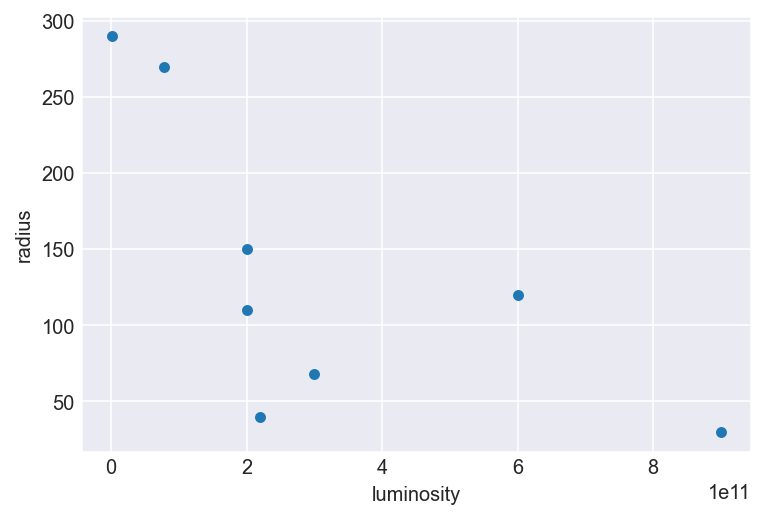

In [24]:
sb.plot(x='luminosity', y='radius', kind='scatter')

### Exercise 5

Let's try to remake a plot from Andrews & Thompson (2011)---or at least a part of it---from our data. First, we're going to need to convert units to centimeters-grams-seconds (cgs). Then we'll apply a few simple formulas.

Handy chart of conversions to cgs: http://www.astro.wisc.edu/~dolan/constants.html

The midplane pressure is $p_\mathrm{mid} = 0.5 \pi G \Sigma_\mathrm{gas} \Sigma_\mathrm{tot}$

In [25]:
# calculate the midplane pressure (the restoring force due to gravity)

G = 6.67e-8  # gravitational constant in cgs
c = 3e10  # speed of light in cgs

# YOUR CODE HERE
p_mid = 0.5 * np.pi * G * sb.sigma_gas * sb.sigma_tot
######

The radiation pressure is $p_\mathrm{rad} = (1 + \tau_\mathrm{FIR}) * flux / c$, where $flux = luminosity / (4 \pi r^2)$.

In [26]:
# calculate the radiation pressure

tau_FIR = 10  # Far-infrared optical depth


# YOUR CODE HERE
flux = (sb.luminosity * 3.9e33) / (4 * np.pi * (sb.radius * 3.086e18)**2)

p_rad = (1 + tau_FIR) * flux / c
######


Text(0, 0.5, 'log(P$_\\mathrm{radiation}$ [ergs cm$^{-3}$])')

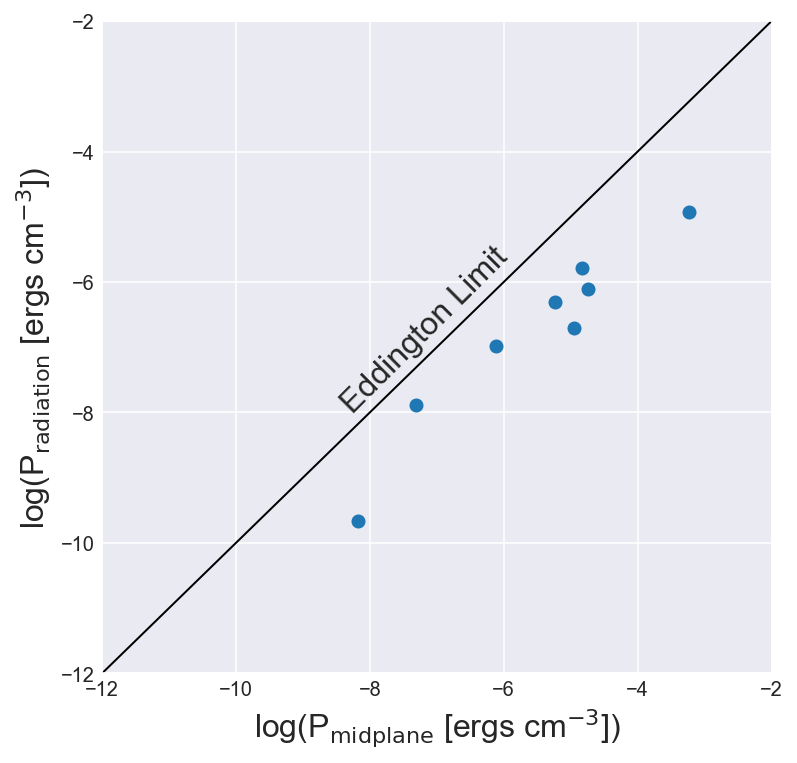

In [27]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(np.log10(p_mid), np.log10(p_rad))
ax.plot([-12, -2], [-12, -2], 'k')
ax.set_xlim([-12, -2])
ax.set_ylim([-12, -2])
ax.text(-8.5, -8, 'Eddington Limit', rotation=45, fontsize=16)
ax.set_xlabel(r'log(P$_\mathrm{midplane}$ [ergs cm$^{-3}$])', fontsize=16)
ax.set_ylabel(r'log(P$_\mathrm{radiation}$ [ergs cm$^{-3}$])', fontsize=16)

### Exercise 6

Read in data from a paper. In this case we're using Table 1 from David Setton's paper [Setton et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020ApJ...905...79S/abstract).  As typeset in the paper, the table looks like the following.

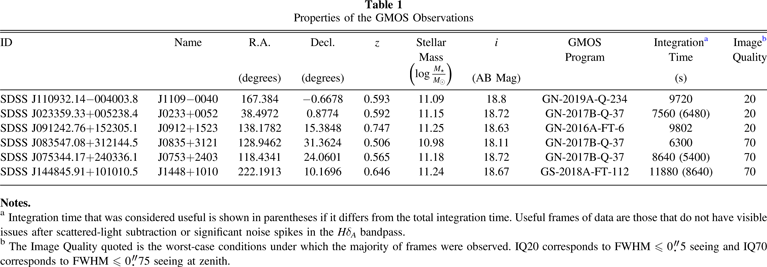

In [28]:
from IPython.display import Image
Image(filename='squiggle_table1.gif') 

However, in ASCII format, the table looks like this:

In [29]:
"""
Table 1
Properties of the GMOS Observations


ID	Name	R.A.	Decl.	z	Stellar	i	GMOS	Integration^a	Image^b
					Mass		Program	Time	Quality
		(degrees)	(degrees)		$\left(\mathrm{log}\tfrac{{M}_{\star }}{{M}_{\odot }}\right)$	(AB Mag)		(s)
SDSS J110932.14-004003.8	J1109-0040	167.384	-0.6678	0.593	11.09	18.8	GN-2019A-Q-234	9720	20
SDSS J023359.33+005238.4	J0233+0052	38.4972	0.8774	0.592	11.15	18.72	GN-2017B-Q-37	7560 (6480)	20
SDSS J091242.76+152305.1	J0912+1523	138.1782	15.3848	0.747	11.25	18.63	GN-2016A-FT-6	9802	20
SDSS J083547.08+312144.5	J0835+3121	128.9462	31.3624	0.506	10.98	18.11	GN-2017B-Q-37	6300	70
SDSS J075344.17+240336.1	J0753+2403	118.4341	24.0601	0.565	11.18	18.72	GN-2017B-Q-37	8640 (5400)	70
SDSS J144845.91+101010.5	J1448+1010	222.1913	10.1696	0.646	11.24	18.67	GS-2018A-FT-112	11880 (8640)	70
Notes.
^a Integration time that was considered useful is shown in parentheses if it differs from the total integration time. Useful frames of data are those that do not have visible issues after scattered-light subtraction or significant noise spikes in the Hdelta_A bandpass.
^b The Image Quality quoted is the worst-case conditions under which the majority of frames were observed. IQ20 corresponds to FWHM <or= 0."5 seeing and IQ70 corresponds to FWHM <or= 0."75 seeing at zenith.
""";

Try reading in this table.

- Hint 1: the columns are tab separated and the special character to indicate tab is `\t`.
- Hint 2: you might need to skip rows at the top and bottom (i.e., footer)
- Hint 3: because the column names span multiple rows, it might be easier to just manually pass in the columns names.

In [30]:
# YOUR CODE HERE

columns = ['ID', 'Name', 'RA', 'Dec', 'z', 'Stellar Mass', 'i',
           'GMOS Program', 'Integration Time', 'Image Quality']
df = pd.read_csv('squiggle.txt', sep='\t', skiprows=7, skipfooter=3, names=columns)

<ipython-input-30-cb9866cc692d>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('squiggle.txt', sep='\t', skiprows=7, skipfooter=3, names=columns)


It seems that the parentheses in the "Integration Time" column forced it to be strings instead of floats.  Let's adopt the non-parenthetical option for Integration Time. We split the strings on `' ('`, take the first value, and we set those values in the dataframe to be our new values.

In [31]:
df.loc[np.array([1, 4, 5]), 'Integration Time'] = [it.split(' (')[0] for it in df['Integration Time'].iloc[np.array([1, 4, 5])]]

The data type of "Integration Time" is still `str`, so let's convert that column to `float` using `astype()`.

In [32]:
df['Integration Time'] = df['Integration Time'].astype(float)

In [33]:
df['Integration Time']

0     9720.0
1     7560.0
2     9802.0
3     6300.0
4     8640.0
5    11880.0
Name: Integration Time, dtype: float64

In [34]:
df

,ID,Name,RA,Dec,z,Stellar Mass,i,GMOS Program,Integration Time,Image Quality
0,SDSS J110932.14-004003.8,J1109-0040,167.3840,-0.6678,0.593,11.09,18.80,GN-2019A-Q-234,9720.0,20
1,SDSS J023359.33+005238.4,J0233+0052,38.4972,0.8774,0.592,11.15,18.72,GN-2017B-Q-37,7560.0,20
2,SDSS J091242.76+152305.1,J0912+1523,138.1782,15.3848,0.747,11.25,18.63,GN-2016A-FT-6,9802.0,20
3,SDSS J083547.08+312144.5,J0835+3121,128.9462,31.3624,0.506,10.98,18.11,GN-2017B-Q-37,6300.0,70
4,SDSS J075344.17+240336.1,J0753+2403,118.4341,24.0601,0.565,11.18,18.72,GN-2017B-Q-37,8640.0,70
5,SDSS J144845.91+101010.5,J1448+1010,222.1913,10.1696,0.646,11.24,18.67,GS-2018A-FT-112,11880.0,70


### Learn more about Pandas

Greg Reda's 3 part Introduction to Pandas:
- [Part I: Intro to Pandas Data Structures](http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/)
- [Part II: Working with Pandas DataFrames](http://www.gregreda.com/2013/10/26/working-with-pandas-dataframes/)
- [Part III: Using Pandas on the MovieLens Dataset](http://www.gregreda.com/2013/10/26/using-pandas-on-the-movielens-dataset/)

More advanced: I really enjoyed Tom Augspurger's [Modern Pandas](https://tomaugspurger.github.io/modern-1-intro) tutorial series, especially the part about [method chaining](https://tomaugspurger.github.io/method-chaining.html).


## Exit Survey